In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [8]:
col = [ 'Class Name','Left weight','Left distance','Right weight','Right distance']
df = pd.read_csv('balance-scale.data',names=col,sep=',')
df.head()

,Class Name,Left weight,Left distance,Right weight,Right distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


Information About Dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class Name      625 non-null    object
 1   Left weight     625 non-null    int64 
 2   Left distance   625 non-null    int64 
 3   Right weight    625 non-null    int64 
 4   Right distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


DOING THE EDA

C:\Users\Josphasito\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class Name', ylabel='count'>

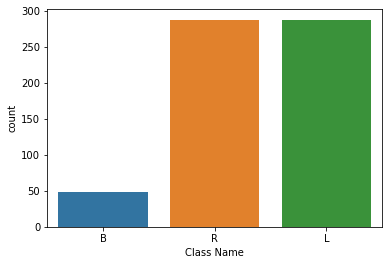

In [4]:
sns.countplot(df['Class Name']) #using seaborn to plot,with countplot function

C:\Users\Josphasito\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Left weight', ylabel='count'>

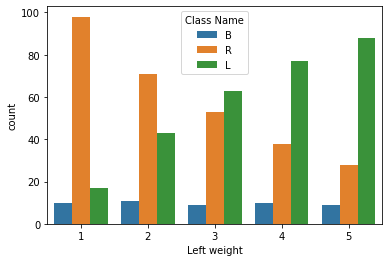

In [5]:
sns.countplot(df['Left weight'],hue=df['Class Name'])

C:\Users\Josphasito\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Right weight', ylabel='count'>

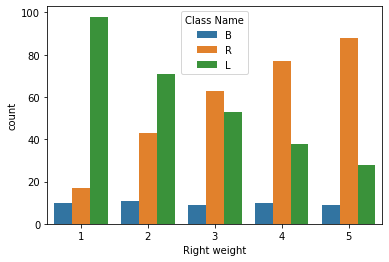

In [6]:
sns.countplot(df['Right weight'],hue=df['Class Name'])

Splitting the Dataset in Train-Test
 we first split the data before we put in in the model

In [13]:
from sklearn.model_selection import train_test_split
X = df.drop('Class Name',axis=1)
y = df[['Class Name']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [15]:
#After  we then train the decision tree classifier, use gini index as our attribute selection
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [12]:
# testing the accuracy
y_predict = clf_model.predict(X_test)

In [17]:
#we use the accuracy_score function to calculate the accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.7021276595744681

In [18]:
#from there we can plot our tree using the graphviz which i dont have
target = list(df['Class Name'].unique())
feature_names = list(X.columns)

In [21]:
 from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf_model,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph
''''
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

feature_names = ['Pclass', 'male']
X = df[feature_names].values
y = df['Survived'].values

dt = DecisionTreeClassifier()
dt.fit(X, y)

dot_file = export_graphviz(dt, feature_names=feature_names)
graph = graphviz.Source(dot_file)
graph.render(filename='tree', format='png', cleanup=True)'''

ModuleNotFoundError: No module named 'graphviz'

In [20]:
#textual representation
from sklearn.tree import export_text
r = export_text(clf_model, feature_names=feature_names)
print(r)

|--- Left weight <= 2.50
|   |--- Right distance <= 1.50
|   |   |--- Left distance <= 2.50
|   |   |   |--- class: R
|   |   |--- Left distance >  2.50
|   |   |   |--- class: L
|   |--- Right distance >  1.50
|   |   |--- Right weight <= 2.50
|   |   |   |--- class: R
|   |   |--- Right weight >  2.50
|   |   |   |--- class: R
|--- Left weight >  2.50
|   |--- Left distance <= 2.50
|   |   |--- Right weight <= 2.50
|   |   |   |--- class: L
|   |   |--- Right weight >  2.50
|   |   |   |--- class: R
|   |--- Left distance >  2.50
|   |   |--- Right distance <= 3.50
|   |   |   |--- class: L
|   |   |--- Right distance >  3.50
|   |   |   |--- class: L



In [23]:
#save the graph
#graph.save(graph1.jpg)